# use GPU T4 x2 for train

# Common
run this code before train model or test model

In [1]:
training_epochs = 7



from datetime import datetime

def log_():
    str_ = f"v20_unstruct_epochs_{training_epochs}"
    
    file_name = f"{str_}.txt"
    with open(file_name, "w") as file:
        file.write(f"{str_}")

def log_time(is_start: str):
    start_str = "start" if is_start else "end"
    
    current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_name = f"{start_str}_{current_time}.txt"
    with open(file_name, "w") as file:
        file.write(f"{start_str}_{current_time}")

log_()
log_time(is_start = True)

In [2]:
!pip install av decord --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 84.5 MB/s eta 0:00:00


In [3]:
def get_prompt(
    include_label: bool,
    banner_text: str,
    label: str
):
    # 비정형
    return (
        f"Classify a banner into:\n"
        f"- Politics\n"
        f"- Public interest\n"
        f"- Commercial purposes\n"
        f"- Other\n\n"
        f"Input(OCR blocks with text, font size, center (x, y), and confidence): {banner_text}\n\n"
        f"Guidelines:\n"
        f"- Politics: mentions of politicians, parties, elections (e.g., 국민의힘, 이재명)\n"
        f"- Public interest: events or announcements (e.g., 축제, 헌혈, 환경)\n"
        f"- Commercial: ads or services (e.g., 세일, 병원, 학원)\n"
        f"- Other: anything unclear or unrelated\n\n"
        f"Instructions:\n"
        f"- Prioritize blocks with largest font size and highest confidence\n"
        f"- Use center (x, y) to determine visual reading order (top-to-bottom, left-to-right)\n"
        f"- Nearby centers imply strong contextual continuity\n"
        f"- Group texts as humans would read\n"
        f"- Output only one category, no explanation or copied text\n"
        f"Answer:{label if include_label else ''}"
    )


# model
original_model_path = "/kaggle/input/hyperclovax-seed-vision-instruct-3b"
# trained_model_path = "/kaggle/input/hypercolvax-3b-fine-tuned-model/hyperclovax-3b-banner-classifier" # on input/
trained_model_path = "/kaggle/working/hyperclovax-3b-banner-classifier"                    # on working/
# ^ trained_model_path select one of them!

# dataset struct
# train_dataset_path = "/kaggle/input/banner-textllm-fine-tuning/banner_classification_train_dataset.csv"
# eval_dataset_path = "/kaggle/input/banner-textllm-fine-tuning/banner_classification_eval_dataset.csv"
# test_dataset_path = "/kaggle/input/banner-textllm-fine-tuning/banner_classification_test_dataset.csv"

# unstruct
train_dataset_path = "/kaggle/input/llm-classification-test/train_dataset.csv"
eval_dataset_path = "/kaggle/input/llm-classification-test/eval_dataset.csv"
test_dataset_path = "/kaggle/input/llm-classification-test/test_dataset.csv"

# output
output_dir = "/kaggle/working/results"

print("done")

done


# Fine-tuning

In [4]:
!pip install trl
!pip install bitsandbytes

print("pip install done")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing 

In [5]:
print("importing...")
import pandas as pd
import torch
from datasets import Dataset
from transformers import AutoTokenizer, TrainingArguments, AutoModelForCausalLM, DataCollatorWithPadding, EarlyStoppingCallback
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from trl import SFTTrainer, DataCollatorForCompletionOnlyLM
import gc

print(f"cuda is available : {torch.cuda.is_available()}")     # True여야 정상
print(f"         GPU name : {torch.cuda.get_device_name()}")  # GPU 이름 출력

print("import done")

importing...


2025-05-26 01:57:54.109003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748224674.637760      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748224674.754748      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


cuda is available : True
         GPU name : Tesla T4
import done


In [6]:
# 1. 원본 모델 클래스 추출
temp_model = AutoModelForCausalLM.from_pretrained(
    original_model_path, trust_remote_code=True
)
HyperCLOVAXBase = temp_model.__class__
del temp_model

# 2. Vision 입력을 완전히 무시하는 커스텀 클래스 정의
class TextOnlyHyperCLOVA(HyperCLOVAXBase):
    def extract_inputs_embeds(self, input_ids, pixel_values=None, **kwargs):
        # 텍스트 임베딩만 반환 (Vision 무시)
        return self.language_model.get_input_embeddings()(input_ids)
    def forward(self, *args, **kwargs):
        kwargs["pixel_values"] = None
        return super().forward(*args, **kwargs)

print("load tokenizer & model...")
# 3. 모델 및 토크나이저 로드
model = TextOnlyHyperCLOVA.from_pretrained(
    original_model_path,
    torch_dtype=torch.float16,
    trust_remote_code=True,
    device_map="auto"
)

tokenizer = AutoTokenizer.from_pretrained(
    original_model_path, trust_remote_code=True
)
tokenizer.pad_token = tokenizer.eos_token

print("load tokenizer & model done")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

load tokenizer & model...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

load tokenizer & model done


In [7]:
# # 데이터 로딩 및 전처리
# train_df = pd.read_csv(train_dataset_path)
# eval_df = pd.read_csv(eval_dataset_path)

# # LLM 입력 포맷 (instruction-style prompt)
# def format_prompt(example):
#     prompt = get_prompt(
#         include_label=True,
#         banner_text=example['text'],
#         label=example['label']
#     )
#     tokenized = tokenizer(prompt, padding="max_length", truncation=True, max_length=384)
#     tokenized["labels"] = tokenized["input_ids"].copy()
#     return tokenized

# train_dataset = Dataset.from_pandas(train_df)
# token_lens = train_dataset.map(lambda x: {"length": len(tokenizer(x["text"])["input_ids"])})
# print(f"Max token length in dataset: {max(token_lens['length'])}")
# train_dataset = train_dataset.map(format_prompt, remove_columns=["text", "label"])

# eval_dataset = Dataset.from_pandas(eval_df)
# eval_dataset = eval_dataset.map(format_prompt, remove_columns=["text", "label"])

# # print(train_dataset[0])

# print("done")

In [8]:
print("loading dataset...")
# 1. 데이터 로딩
train_df = pd.read_csv(train_dataset_path)
eval_df = pd.read_csv(eval_dataset_path)

# 2. Null 방지: text 열 문자열화 및 공백 채우기
train_df["text"] = train_df["text"].astype(str).fillna("empty")
eval_df["text"] = eval_df["text"].astype(str).fillna("empty")

# 3. HuggingFace Dataset 변환
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)

# 4. 토큰 길이 측정 (디버깅용)
token_lens = train_dataset.map(lambda x: {"length": len(tokenizer(x["text"], truncation=True)["input_ids"])})
print(f"Max token length in dataset: {max(token_lens['length'])}")

# 5. Prompt 포맷 함수
def format_prompt(example):
    prompt = get_prompt(
        include_label=True,
        banner_text=example['text'],
        label=example['label']
    )
    tokenized = tokenizer(prompt, padding="max_length", truncation=True, max_length=2048)
    tokenized["labels"] = tokenized["input_ids"].copy()
    return tokenized

# 6. Tokenize + Prompt 생성
train_dataset = train_dataset.map(format_prompt, remove_columns=["text", "label"])
eval_dataset = eval_dataset.map(format_prompt, remove_columns=["text", "label"])

print("load dataset done")

loading dataset...


Map:   0%|          | 0/932 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Max token length in dataset: 1823


Map:   0%|          | 0/932 [00:00<?, ? examples/s]

Map:   0%|          | 0/311 [00:00<?, ? examples/s]

load dataset done


In [9]:
# LoRA 설정
peft_config = LoraConfig(
    r=4,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"]
)

model = prepare_model_for_kbit_training(model, use_gradient_checkpointing=True)
model = get_peft_model(model, peft_config)

print("peft_config done")

peft_config done


In [10]:
# Collator 설정
collator = DataCollatorForCompletionOnlyLM(
    tokenizer=tokenizer,
    response_template="Answer:"
)

print("collator done")

collator done


In [11]:
# TrainingArguments 설정
training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    logging_steps=5,
    save_steps=50,
    num_train_epochs=training_epochs,
    learning_rate=5e-5,
    fp16=True,
    save_total_limit=10,
    report_to="none",

    # eval_strategy="epoch",                # 또는 "steps"
    # save_strategy="epoch",                # eval과 맞추면 좋음
    # load_best_model_at_end=True,          # 가장 성능 좋은 모델 저장
    metric_for_best_model="eval_loss",    # 기준 metric 지정
    greater_is_better=False               # 낮을수록 좋은 metric일 경우 (eval_loss는 낮을수록 좋음)
)

print("training_args done")

training_args done


In [12]:
# SFTTrainer 구성
trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=collator,
    # callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
)

print("SFTTrainer done")

Truncating train dataset:   0%|          | 0/932 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/311 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


SFTTrainer done


## train

In [13]:
print("training...")
# 학습 시작
trainer.train()

print("training done")

training...


/usr/local/lib/python3.11/dist-packages/trl/trainer/utils.py:150: UserWarning: Could not find response key `Answer:` in the following instance: Classify a banner into:
- Politics
- Public interest
- Commercial purposes
- Other

Input(OCR blocks with text, font size, center (x, y), and confidence): [{'text': '발표회', 'font_size': 44.0, 'center': [623.0, 49.0], 'conf': 1.0}, {'text': '주민총회', 'font_size': 40.03, 'center': [347.8, 43.5], 'conf': 1.0}, {'text': '프로그램', 'font_size': 39.51, 'center': [501.5, 47.2], 'conf': 1.0}, {'text': '물금읍', 'font_size': 39.05, 'center': [240.5, 41.0], 'conf': 0.99}, {'text': '2024년', 'font_size': 38.03, 'center': [143.8, 38.5], 'conf': 1.0}, {'text': '&', 'font_size': 29.0, 'center': [421.5, 46.5], 'conf': 1.0}, {'text': '장소', 'font_size': 21.0, 'center': [416.5, 86.5], 'conf': 1.0}, {'text': '오후2시', 'font_size': 20.6, 'center': [268.5, 78.2], 'conf': 1.0}, {'text': '3055-392-7089', 'font_size': 20.01, 'center': [411.2, 109.0], 'conf': 0.97}, {'text': '2764

Step,Training Loss
5,67.763800
10,74.838400
15,37.088400
20,26.091600
25,15.228900
30,8.251300
35,6.632100
40,5.848300
45,5.283700
50,8.310400


/usr/local/lib/python3.11/dist-packages/trl/trainer/utils.py:150: UserWarning: Could not find response key `Answer:` in the following instance: Classify a banner into:
- Politics
- Public interest
- Commercial purposes
- Other

Input(OCR blocks with text, font size, center (x, y), and confidence): [{'text': '대회', 'font_size': 43.05, 'center': [638.0, 78.0], 'conf': 1.0}, {'text': '금산인삼축제', 'font_size': 41.05, 'center': [265.0, 98.0], 'conf': 1.0}, {'text': '마라톤대회', 'font_size': 40.53, 'center': [425.8, 90.8], 'conf': 0.9}, {'text': '및', 'font_size': 39.08, 'center': [520.8, 85.5], 'conf': 1.0}, {'text': '2024', 'font_size': 39.0, 'center': [144.5, 102.5], 'conf': 1.0}, {'text': '금산군민', 'font_size': 19.03, 'center': [325.5, 56.0], 'conf': 0.96}, {'text': '참가금', 'font_size': 19.03, 'center': [413.0, 52.0], 'conf': 1.0}, {'text': '런님화', 'font_size': 19.0, 'center': [501.0, 46.5], 'conf': 0.96}, {'text': '10000원', 'font_size': 18.61, 'center': [457.0, 48.8], 'conf': 0.92}, {'text': '5km걷지'

training done


## save model

In [14]:
print("saving model...")
# 모델 저장
model.save_pretrained(trained_model_path)
tokenizer.save_pretrained(trained_model_path)

# make zip
import shutil
shutil.make_archive(
    base_name=trained_model_path + "_",              # zip 파일이 저장될 경로 (확장자 없이)
    format='zip',
    root_dir="/kaggle/working",               # 기준 디렉토리
    base_dir=trained_model_path.split('/')[-1]  # 기준 내 압축할 디렉토리 이름
)
    
print("save model done")

saving model...
save model done


In [15]:
#delete memory
# 모델 삭제
del model
del tokenizer
gc.collect()

# CUDA 캐시 초기화
torch.cuda.empty_cache()

print("delete model & memory done")

delete model & memory done


# Test

In [16]:
print("test starting...")
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
import gc
import torch
import time

show_log = False

# 1. 원본 모델 클래스 추출
temp_model = AutoModelForCausalLM.from_pretrained(
    original_model_path, trust_remote_code=True
)
HyperCLOVAXBase = temp_model.__class__
del temp_model

# 2. Vision 입력을 완전히 무시하는 커스텀 클래스 정의
class TextOnlyHyperCLOVA(HyperCLOVAXBase):
    def extract_inputs_embeds(self, input_ids, pixel_values=None, **kwargs):
        # 텍스트 임베딩만 반환 (Vision 무시)
        return self.language_model.get_input_embeddings()(input_ids)
    def forward(self, *args, **kwargs):
        kwargs["pixel_values"] = None
        return super().forward(*args, **kwargs)


print(f"cuda is available : {torch.cuda.is_available()}")     # True여야 정상
print(f"         GPU name : {torch.cuda.get_device_name()}")  # GPU 이름 출력

evaluation_results = [["Model","Accuracy", "Macro Precision", "Macro Recall", "Macro F1 Score", "Avg time/text(sec)"]]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 불러오기
print("loading test dataset... ", end = "")
test_dataset_df = pd.read_csv(test_dataset_path)

print("done")

for model_path in [trained_model_path]:

    # 저장된 모델 및 토크나이저 로드
    print("loading model... ", end = "")


    # 1. 원본 모델 클래스 추출
    temp_model = AutoModelForCausalLM.from_pretrained(
        model_path, trust_remote_code=True
    )
    HyperCLOVAXBase = temp_model.__class__
    del temp_model
    
    
    # 3. 모델 및 토크나이저 로드
    model = TextOnlyHyperCLOVA.from_pretrained(
        model_path,
        torch_dtype=torch.float16,
        trust_remote_code=True,
        device_map="auto"
    )
    print("done")

    print("loading tokenizer... ", end = "")
    tokenizer = AutoTokenizer.from_pretrained(
        model_path,
        local_files_only=True
    )
    tokenizer.pad_token = tokenizer.eos_token
    print("done")

    
    # 예측 수행
    print("testing... ")
    
    predictions = []

    start_time = time.time()
    for index, banner_text in enumerate(test_dataset_df["text"]):
        prompt = get_prompt(
                include_label = False,
                banner_text = banner_text,
                label = ''
            )
        inputs = tokenizer(prompt, return_tensors="pt").to(device)
        outputs = model.generate(
            **inputs,
            max_new_tokens=5,
            do_sample=False,
            eos_token_id=tokenizer.eos_token_id
        )
        
        decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
        
        # 결과 정리
        predict_label = decoded.split("Answer:")[-1].strip().split("\n")[0]
        predictions.append(predict_label)

        if show_log:
            true_label = test_dataset_df['label'][index]
            is_right = "✅" if predict_label == true_label else "❌"
            
            print("--------------------------------------------------------------------------------------")
            print(f"banner text: -/{banner_text}/-")
            print(f"{is_right} predict: -/{predict_label}/- | true: -/{true_label}/-")
    end_time = time.time()  
    
    # 평가
    y_true = test_dataset_df["label"]
    y_pred = predictions
    
    
    # 평가 지표 계산
    accuracy = accuracy_score(y_true, y_pred)
    macro_precision = precision_score(y_true, y_pred, average="macro", zero_division=0)
    macro_recall = recall_score(y_true, y_pred, average="macro", zero_division=0)
    macro_f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)
    avg_time = (end_time - start_time) / len(test_dataset_df["text"].tolist())
    
    # 출력
    model_name = ("HyperCLOVAX-3B" 
                  if model_path == original_model_path else 
                  "HyperCLOVAX-3B-fine-tuned")
    print("--------------------------------------------------------------------------------------")
    print(f"model              : {model_name}")
    print(f"Accuracy           : {accuracy:.4f}")
    print(f"Macro Precision    : {macro_precision:.4f}")
    print(f"Macro Recall       : {macro_recall:.4f}")
    print(f"Macro F1 Score     : {macro_f1:.4f}")
    print(f"Avg time/text(sec) : {avg_time:.4f}")
    print("--------------------------------------------------------------------------------------")

    # 결과 저장
    evaluation_results.append([
        model_name,
        f"{accuracy:.4f}",
        f"{macro_precision:.4f}",
        f"{macro_recall:.4f}",
        f"{macro_f1:.4f}",
        f"{avg_time:.4f}"
    ])

    #delete memory
    # 모델 삭제
    del model
    del tokenizer
    gc.collect()
    
    # CUDA 캐시 초기화
    torch.cuda.empty_cache()

print("\ntest done")

test starting...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

cuda is available : True
         GPU name : Tesla T4
loading test dataset... done
loading model... 

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

done
loading tokenizer... done
testing... 
--------------------------------------------------------------------------------------
model              : HyperCLOVAX-3B-fine-tuned
Accuracy           : 0.8521
Macro Precision    : 0.8586
Macro Recall       : 0.8416
Macro F1 Score     : 0.8491
Avg time/text(sec) : 1.8610
--------------------------------------------------------------------------------------

test done


## draw table

GPU: Tesla T4


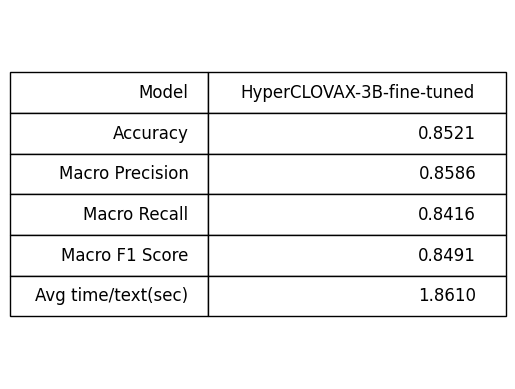

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame 생성 및 전치
df_raw = pd.DataFrame(evaluation_results[1:], columns=evaluation_results[0])
df = df_raw.set_index(evaluation_results[0][0]).T

# 컬럼 이름 및 인덱스 이름 준비
row_labels = df.index.tolist()
col_labels = df.columns.tolist()

# 왼쪽 상단 빈칸에 'name' 표시를 넣기 위해 row_labels와 col_labels 확장
table_data = df.values.tolist()
table_data_with_row_labels = [[row_labels[i]] + row for i, row in enumerate(table_data)]
full_table = [[evaluation_results[0][0]] + col_labels] + table_data_with_row_labels

# 시각화
fig, ax = plt.subplots()
ax.axis("off")
ax.axis("tight")

table = ax.table(
    cellText=full_table,
    loc="center"
)

# 글꼴 크기, 너비, 높이 조정
col_widths = [0.6] * len(full_table[0])
col_widths[0] = 0.4
row_height = 0.11
font_size = 20

for (row, col), cell in table.get_celld().items():
    if col < len(col_widths):
        cell.set_width(col_widths[col])
    cell.set_height(row_height)
    cell.get_text().set_fontsize(font_size)

for col in range(1, len(full_table[0])):
    table[(0, col)].get_text().set_ha("center")
    table[(0, col)].get_text().set_va("center")

print(f"GPU: {torch.cuda.get_device_name()}")
plt.show()

log_time(is_start = False)